# Previsão de notas dos alunos
Muitos alunos de pós-graduação têm dificuldade em obter boas notas porque não recebem muito apoio nos cursos superiores em comparação com o apoio que os alunos recebem nas escolas. Alguns alunos precisam de muita atenção dos instrutores para que obtenham boas notas, sem isso, o estado emocional do aluno pode ser prejudicial para a sua carreira a longo prazo.

**O objetivo desse projeto é, através do aprendizado de máquina, prever as notas dos alunos para que os instrutores possam ajudar os alunos a se prepararem para tópicos em que as notas dos alunos foram previstas baixas.**  



https://www.kaggle.com/code/ramontanoeiro/student-performance/notebook

# #4 - Avaliação dos algoritmos
Algoritmos que utilizarão a base de dados com numéricos normalizados
- from sklearn.svm import SVR
- from sklearn.neural_network import MLPRegressor
- from sklearn.neighbors import KNeighborsRegressor

Algoritmos que utilizarão a base de dados com numéricos **não** normalizados
- from sklearn.tree import DecisionTreeRegressor
- from sklearn.ensemble import RandomForestRegressor
- from gboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
import pandas as pd
import numpy as np
import math
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
path_datasets = '/content/drive/MyDrive/Machine Learning e Data Science com Python/Projeto - Nota dos Alunos/'

## Carregando datasets tratado
- **MA:** Dataset sem features com multicolinearidade alta
- **MMA:** Dataset sem features com multicolinearidade muito alta
- **NN:** Dataset com features numéricas não normalizadas

In [ ]:
with open(path_datasets+'students_data_2.pkl', 'rb') as f:
  [X_train, X_MA_train, X_MMA_train,
   X_test , X_MA_test , X_MMA_test ,

   X_forest_train, X_forest_test,
   X_xgbr_train, X_xgbr_test,
   X_tree_train, X_tree_test,
   X_svm_lin_train, X_svm_lin_test,
   
   y_train, y_test] = pkl.load(f)

In [ ]:
print('Todos os attrs; Attrs sem multicoliniearidade alta; Atts sem multicolinieridade muito alta')
print(X_train.shape, X_MA_train.shape, X_MMA_train.shape)
print(X_test.shape, X_MA_test.shape, X_MMA_test.shape)
print('-'*50)
print('Base de dados para usar o algoritmo Random Forest')
print(X_forest_train.shape, X_forest_test.shape) 
print('Base de dados para usar o algoritmo XGBooster')
print(X_xgbr_train.shape, X_xgbr_test.shape)
print('Base de dados para usar o algoritmo Decision Tree')
print(X_tree_train.shape, X_tree_test.shape)
print('Base de dados para usar o algoritmo SVM Linear')
print(X_svm_lin_train.shape, X_svm_lin_test.shape)
print('Target')
print(y_train.shape, y_test.shape)

Todos os attrs; Attrs sem multicoliniearidade alta; Atts sem multicolinieridade muito alta
(296, 34) (296, 26) (296, 30)
(99, 34) (99, 26) (99, 30)
--------------------------------------------------
Base de dados para usar o algoritmo Random Forest
(296, 5) (99, 5)
Base de dados para usar o algoritmo XGBooster
(296, 2) (99, 2)
Base de dados para usar o algoritmo Decision Tree
(296, 2) (99, 2)
Base de dados para usar o algoritmo SVM Linear
(296, 1) (99, 1)
Target
(296,) (99,)


## Otimização dos hiperparâmetros
Seguindo a métrica da sessão 03, iremos utiliar o Mean Absolute Error (MAE).O erro absoluto médio é uma medida de erros entre observações pareadas que expressam o mesmo fenômeno. O MAE é calculado como a soma dos erros absolutos dividido pelo tamanho da amostra.  
**O MAE calcula as diferenças absolutas entre as previsões e os valores reais.**

In [ ]:
metrics = {'MAE': make_scorer(mean_absolute_error)}

## Avaliação dos algoritmos - dataset com tratamento de multicolinearidade

In [ ]:
# Algoritmos que utilizarão a base de dados com tratamentos de multicolinearidade
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def GridSearch1(model, params, X, y, ref = 'Default'):
  grid_search = GridSearchCV(model(), scoring = metrics, param_grid = params,
                             n_jobs = 4, refit = False)
  
  grid_search.fit(X, y)
  results = grid_search.cv_results_
  results = pd.DataFrame(data = results, columns = results.keys())
  results.sort_values(by = ['rank_test_MAE'], inplace = True)
  results['Ref'] = ref
  return results

### KNN

In [ ]:
params_knn = {  'n_neighbors': (3, 5, 7, 9)
              , 'weights': ('uniform', 'distance')
              , 'algorithm': ('auto', )
              , 'p': (1, 2)}

In [ ]:
GS_KNN     = GridSearch1(KNeighborsRegressor, params_knn, X_train    , y_train)
GS_KNN_MA  = GridSearch1(KNeighborsRegressor, params_knn, X_MA_train , y_train, 'MA')
GS_KNN_MMA = GridSearch1(KNeighborsRegressor, params_knn, X_MMA_train, y_train, 'MMA')

In [ ]:
GS_KNN_Concat = pd.concat([GS_KNN, GS_KNN_MA, GS_KNN_MMA])
GS_KNN_Concat.sort_values(by = ['rank_test_MAE'], inplace = True)
GS_KNN_Concat[ GS_KNN_Concat['rank_test_MAE'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,Ref
2,0.003475,0.000271,0.004490,0.001491,auto,3,2,uniform,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2...",3.127778,3.983051,2.988701,3.429379,3.152542,3.336290,0.353560,1,Default
3,0.003966,0.000986,0.004726,0.001348,auto,3,2,distance,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2...",3.621203,4.652827,3.451901,3.699824,3.571585,3.799468,0.434203,1,MA
3,0.003426,0.000212,0.003794,0.000176,auto,3,2,distance,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2...",3.853874,4.603514,3.652043,3.811494,3.655621,3.915309,0.353532,1,MMA


In [ ]:
best_params_KNN = GS_KNN_Concat.head(1)['params'].values
best_params_KNN

array([{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}],
      dtype=object)

### MLP

In [ ]:
params_MLP = {'hidden_layer_sizes': ((5,5), (4,4), (6,6), (5,5,5), (4,4,4), (6,6,6)), 
              'activation': ('identity', 'logistic', 'tanh', 'relu'),
              'solver': ('lbfgs', 'sgd', 'adam'),
              'learning_rate': ('constant', 'invscaling', 'adaptive')}

In [ ]:
GS_MLP     = GridSearch1(MLPRegressor, params_MLP, X_train    , y_train)
GS_MLP_MA  = GridSearch1(MLPRegressor, params_MLP, X_MA_train , y_train, 'MA')
GS_MLP_MMA = GridSearch1(MLPRegressor, params_MLP, X_MMA_train, y_train, 'MMA')

In [ ]:
GS_MLP_Concat = pd.concat([GS_MLP, GS_MLP_MA, GS_MLP_MMA])
GS_MLP_Concat.sort_values(by = ['rank_test_MAE'], inplace = True)
GS_MLP_Concat[ GS_MLP_Concat['rank_test_MAE'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,Ref
202,0.928092,0.135689,0.005334,0.004172,relu,"(4, 4, 4)",invscaling,sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",10.060690,7.372820,9.946865,10.097950,11.048556,9.705376,1.231555,1,Default
58,0.615652,0.032930,0.006611,0.003014,logistic,"(5, 5)",invscaling,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",10.331343,8.185135,10.623302,9.266306,10.397374,9.760692,0.916722,1,MA
85,0.767344,0.026413,0.006638,0.003385,logistic,"(5, 5, 5)",invscaling,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",10.762314,7.764813,9.614260,9.260199,9.787490,9.437815,0.973467,1,MMA


In [ ]:
best_params_MLP = GS_MLP_Concat.head(1)['params'].values
best_params_MLP

array([{'activation': 'relu', 'hidden_layer_sizes': (4, 4, 4), 'learning_rate': 'invscaling', 'solver': 'sgd'}],
      dtype=object)

### SVM

In [ ]:
params_SVM = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'degree': (2,3,4),
              'gamma': ('scale','auto'),
              'tol': (10**-3, 10**-4),
              'C': (.8, 1, 1.2)}

In [ ]:
GS_SVM     = GridSearch1(SVR, params_SVM, X_train    , y_train)
GS_SVM_MA  = GridSearch1(SVR, params_SVM, X_MA_train , y_train, 'MA')
GS_SVM_MMA = GridSearch1(SVR, params_SVM, X_MMA_train, y_train, 'MMA')

In [ ]:
GS_SVM_Concat = pd.concat([GS_SVM, GS_SVM_MA, GS_SVM_MMA])
GS_SVM_Concat.sort_values(by = ['rank_test_MAE'], inplace = True)
GS_SVM_Concat[ GS_SVM_Concat['rank_test_MAE'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_tol,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,Ref
30,0.015507,0.001357,0.011744,0.001659,0.8,4,auto,poly,0.001,"{'C': 0.8, 'degree': 4, 'gamma': 'auto', 'kern...",3.537994,4.070872,2.510564,3.280481,3.467579,3.373498,0.505083,1,Default
31,0.021888,0.004183,0.008789,0.004997,0.8,4,auto,poly,0.0001,"{'C': 0.8, 'degree': 4, 'gamma': 'auto', 'kern...",3.552378,4.081986,2.522076,3.294303,3.481265,3.386401,0.505159,1,MMA
97,0.030546,0.005252,0.003862,0.000108,1.2,4,scale,poly,0.0001,"{'C': 1.2, 'degree': 4, 'gamma': 'scale', 'ker...",3.209742,4.198394,2.864691,3.398210,3.469745,3.428157,0.438427,1,MA


In [ ]:
best_params_SVM = GS_SVM_Concat.head(1)['params'].values
best_params_SVM

array([{'C': 0.8, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly', 'tol': 0.001}],
      dtype=object)

## Avaliação dos algoritmos - dataset personalizado

In [ ]:
# Algoritmos que utilizarão base de dados adaptadas para o modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Decision Tree

In [ ]:
params_tree = {'criterion': ('absolute_error', ),
              'splitter': ('best', ),
              'min_samples_split': (2, 3, 5, 8),
              'min_samples_leaf': (1, 2, 3, 5),
              'max_features': ('auto', 'sqrt', 'log2')}

In [ ]:
GS_Tree = GridSearch1(DecisionTreeRegressor, params_tree, X_tree_train, y_train)
GS_Tree[ GS_Tree['rank_test_MAE'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,Ref
44,0.00649,0.004497,0.003509,0.002415,absolute_error,log2,5,2,best,"{'criterion': 'absolute_error', 'max_features'...",1.116667,1.330508,1.211864,1.050847,1.415254,1.225028,0.133841,1,Default


In [ ]:
best_params_Tree = GS_Tree.head(1)['params'].values
best_params_Tree

array([{'criterion': 'absolute_error', 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}],
      dtype=object)

### Random Forest

In [ ]:
params_forest = {'n_estimators': (21, 34, 55, 89, 100, 144),
                'criterion': ('absolute_error', ),
                'min_samples_split': (2, 3, 5, 8),
                'min_samples_leaf': (1, 2, 3, 5),
                'max_features': ('sqrt', 'log2'),
                'oob_score': (True,False)
                }

In [ ]:
GS_Forest = GridSearch1(RandomForestRegressor, params_forest, X_forest_train, y_train)
GS_Forest[ GS_Forest['rank_test_MAE'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_oob_score,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,Ref
12,0.175738,0.018491,0.017027,0.006321,absolute_error,sqrt,1,3,21,True,"{'criterion': 'absolute_error', 'max_features'...",3.588889,3.766344,2.892252,3.422518,3.32728,3.399457,0.294445,1,Default


In [ ]:
best_params_Forest = GS_Forest.head(1)['params'].values
best_params_Forest

array([{'criterion': 'absolute_error', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 21, 'oob_score': True}],
      dtype=object)

### XGBoost

In [ ]:
params_XGBR = {'max_depth': (2, 3, 5, 8, 13),
              'learning_rate': (.1, .2, .3, .5, .8),
              'n_estimators': (21, 34, 55, 89, 100, 144),
              'objective': ("reg:linear", 'reg:pseudohubererror'),
              'booster': ('gbtree', 'gblinear', 'dart'),
              'min_child_weight': (1,2,3,5),
              'max_delta_step': (0,1,2,3),
              'subsample': (.5, 1)}

In [ ]:
GS_XGBR = GridSearch1(XGBRegressor, params_XGBR, X_xgbr_train, y_train)
GS_XGBR[ GS_XGBR['rank_test_MAE'] == 1]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [1.60365324 1.60082306        nan ... 1.02237218        nan        nan]
  category=UserWarning,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_learning_rate,param_max_delta_step,param_max_depth,param_min_child_weight,param_n_estimators,...,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,Ref
19752,0.020102,0.003022,0.002843,0.002835,dart,0.1,1,2,5,21,...,"{'booster': 'dart', 'learning_rate': 0.1, 'max...",8.980777,7.195101,8.160792,7.953579,8.82372,8.222794,0.643137,1,Default
20040,0.022165,0.003451,0.001547,0.000157,dart,0.1,1,8,5,21,...,"{'booster': 'dart', 'learning_rate': 0.1, 'max...",8.980777,7.195101,8.160792,7.953579,8.82372,8.222794,0.643137,1,Default
19848,0.018747,0.004912,0.002889,0.002847,dart,0.1,1,3,5,21,...,"{'booster': 'dart', 'learning_rate': 0.1, 'max...",8.980777,7.195101,8.160792,7.953579,8.82372,8.222794,0.643137,1,Default
20136,0.024721,0.004400,0.001381,0.000035,dart,0.1,1,13,5,21,...,"{'booster': 'dart', 'learning_rate': 0.1, 'max...",8.980777,7.195101,8.160792,7.953579,8.82372,8.222794,0.643137,1,Default
19944,0.014780,0.008840,0.001454,0.000110,dart,0.1,1,5,5,21,...,"{'booster': 'dart', 'learning_rate': 0.1, 'max...",8.980777,7.195101,8.160792,7.953579,8.82372,8.222794,0.643137,1,Default


In [ ]:
best_params_XGBR = GS_XGBR.head(1)['params'].values
best_params_XGBR

array([{'booster': 'dart', 'learning_rate': 0.1, 'max_delta_step': 1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 21, 'objective': 'reg:linear', 'subsample': 0.5}],
      dtype=object)

### SVM Linear

In [ ]:
params_SVML = {'kernel': ('linear', ),
              'gamma': ('scale','auto'),
              'tol': (10**-3, 10**-4),
              'C': (.6, .8, 1, 1.2, 1.4)}

In [ ]:
from sklearn import svm
GS_SVML = GridSearch1(SVR, params_SVML, X_svm_lin_train, y_train)
GS_SVML[ GS_SVML['rank_test_MAE'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_tol,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,Ref
15,0.076574,0.022844,0.006820,0.005228,1.2,auto,linear,0.0001,"{'C': 1.2, 'gamma': 'auto', 'kernel': 'linear'...",0.923333,1.276271,0.781954,0.80904,0.815254,0.92117,0.183997,1,Default
14,0.067321,0.010102,0.007095,0.003594,1.2,auto,linear,0.001,"{'C': 1.2, 'gamma': 'auto', 'kernel': 'linear'...",0.923333,1.276271,0.781954,0.80904,0.815254,0.92117,0.183997,1,Default
13,0.066052,0.011900,0.005456,0.005256,1.2,scale,linear,0.0001,"{'C': 1.2, 'gamma': 'scale', 'kernel': 'linear...",0.923333,1.276271,0.781954,0.80904,0.815254,0.92117,0.183997,1,Default
12,0.064420,0.004407,0.006859,0.004040,1.2,scale,linear,0.001,"{'C': 1.2, 'gamma': 'scale', 'kernel': 'linear...",0.923333,1.276271,0.781954,0.80904,0.815254,0.92117,0.183997,1,Default


In [ ]:
best_params_SVML = GS_SVML.head(1)['params'].values
best_params_SVML

array([{'C': 1.2, 'gamma': 'auto', 'kernel': 'linear', 'tol': 0.0001}],
      dtype=object)

## Validação cruzada com os hiperparâmetros encontrados

In [ ]:
results_knn = list()
results_mlp = list()
results_svm = list()
results_tree   = list()
results_forest = list()
results_xgbr   = list()
results_svml   = list()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
for i in range(30):
  print(f'Teste No. {i+1}')
  cv = KFold(shuffle = True, random_state = i)

  model_knn = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 3, p = 2, weights = 'uniform')
  model_mlp = MLPRegressor(activation = 'relu', hidden_layer_sizes = (4, 4, 4), learning_rate = 'invscaling', solver =  'sgd')
  model_svm = SVR(C = 0.8, degree = 4, gamma = 'auto', kernel = 'poly', tol = 0.001)
  model_tree   = DecisionTreeRegressor(criterion =  'absolute_error', max_features = 'log2', min_samples_leaf =  5, min_samples_split = 2, splitter = 'best')
  model_forest = RandomForestRegressor(criterion =  'absolute_error', max_features =  'sqrt', min_samples_leaf =  1, min_samples_split =  3, n_estimators = 21, oob_score = True)
  model_xgbr   = XGBRegressor(booster = 'dart', learning_rate = 0.1, max_delta_step = 1, max_depth = 2, min_child_weight = 5, n_estimators = 21, objective =  'reg:squarederror', subsample = 0.5)
  model_svml   = SVR(C = 1.2, gamma = 'auto', kernel = 'linear', tol = 0.0001)

  score_knn  =  cross_val_score(model_knn, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv)
  score_mlp  =  cross_val_score(model_mlp, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv)
  score_svm  =  cross_val_score(model_svm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv)
  score_tree   =  cross_val_score(model_tree  , X_tree_train   , y_train, scoring = 'neg_mean_absolute_error', cv = cv)
  score_forest =  cross_val_score(model_forest, X_forest_train , y_train, scoring = 'neg_mean_absolute_error', cv = cv)
  score_xgbr   =  cross_val_score(model_xgbr  , X_xgbr_train   , y_train, scoring = 'neg_mean_absolute_error', cv = cv)
  score_svml   =  cross_val_score(model_svml  , X_svm_lin_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv)

  results_knn.append(score_knn.mean())
  results_mlp.append(score_mlp.mean())
  results_svm.append(score_svm.mean())
  results_tree.append(score_tree.mean())
  results_forest.append(score_forest.mean())
  results_xgbr.append(score_xgbr.mean())
  results_svml.append(score_svml.mean())

Teste No. 1
Teste No. 2
Teste No. 3
Teste No. 4
Teste No. 5
Teste No. 6
Teste No. 7
Teste No. 8
Teste No. 9
Teste No. 10
Teste No. 11
Teste No. 12
Teste No. 13
Teste No. 14
Teste No. 15
Teste No. 16
Teste No. 17
Teste No. 18
Teste No. 19
Teste No. 20
Teste No. 21
Teste No. 22
Teste No. 23
Teste No. 24
Teste No. 25
Teste No. 26
Teste No. 27
Teste No. 28
Teste No. 29
Teste No. 30


O **SVM Linear** obteve o melhor resultado entre os modelos treinados, obtendo em média um erro absoluto de 0,92 pontos (Desvio de 0,3%). A **Decision Tree** possui uma métrica aceitável com um erro absoluto de 1,11 pontos (Desvio de 10%).  

O algoritmo **XGBoost** obteve o pior resultado entre os modelos obtendo um MAE médio de 8,22 pontos (Desvio de 0,08%)

In [ ]:
results = pd.DataFrame({'KNN': results_knn,
                        'MLP': results_mlp,
                        'SVM': results_svm,
                        'Tree': results_tree,
                        'Forest': results_forest,
                        'XGBR': results_xgbr,
                        'SVM-Linear': results_svml,
                        })
results.head(30)

,KNN,MLP,SVM,Tree,Forest,XGBR,SVM-Linear
0,-3.365198,-7.360096,-3.374014,-1.255311,-3.228072,-8.224195,-0.918579
1,-3.322298,-6.443622,-3.385408,-1.034831,-3.212073,-8.216204,-0.925222
2,-3.293522,-7.056686,-3.369568,-1.109350,-3.100654,-8.213391,-0.918289
3,-3.182166,-5.381270,-3.383752,-1.235339,-3.236991,-8.219029,-0.919392
4,-3.323484,-5.910160,-3.403848,-1.048814,-3.124767,-8.225564,-0.920391
5,-3.303126,-6.645570,-3.416271,-1.053729,-3.144654,-8.214290,-0.920633
6,-3.463371,-8.468985,-3.382393,-0.968475,-3.229356,-8.227525,-0.921178
7,-3.360132,-8.738341,-3.368379,-0.992034,-3.098485,-8.245138,-0.925805
8,-3.306798,-9.505465,-3.378765,-1.151808,-3.160530,-8.229235,-0.923544
9,-3.319586,-8.251042,-3.376308,-1.112514,-3.103388,-8.220220,-0.918986


In [ ]:
results.describe()

,KNN,MLP,SVM,Tree,Forest,XGBR,SVM-Linear
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,-3.311039,-7.490463,-3.382452,-1.110351,-3.160680,-8.221600,-0.922837
std,0.069917,1.225044,0.016313,0.109139,0.060327,0.008408,0.003294
min,-3.463371,-9.947046,-3.416271,-1.379520,-3.306641,-8.245138,-0.929206
25%,-3.360132,-8.341076,-3.393702,-1.185516,-3.209363,-8.225564,-0.925805
50%,-3.304962,-7.598564,-3.381372,-1.078997,-3.156209,-8.218476,-0.923223
75%,-3.277288,-6.607256,-3.370977,-1.027006,-3.114283,-8.215771,-0.919776
max,-3.145989,-4.802822,-3.350817,-0.909435,-3.039381,-8.211435,-0.917310


In [ ]:
data_boxplot = []

In [ ]:
for knn, mlp, svm, tree, forest, xgbr, svml in results.values:
  data_boxplot.append(('knn', knn))
  data_boxplot.append(('mlp', mlp))
  data_boxplot.append(('svm', svm))
  data_boxplot.append(('tree', tree))
  data_boxplot.append(('forest', forest))
  data_boxplot.append(('xgbr', xgbr))
  data_boxplot.append(('svml', svml))
results_boxplot = pd.DataFrame(data_boxplot, columns = ['model', 'mae'])
results_boxplot.head()

,model,mae
0,knn,-3.365198
1,mlp,-7.360096
2,svm,-3.374014
3,tree,-1.255311
4,forest,-3.228072


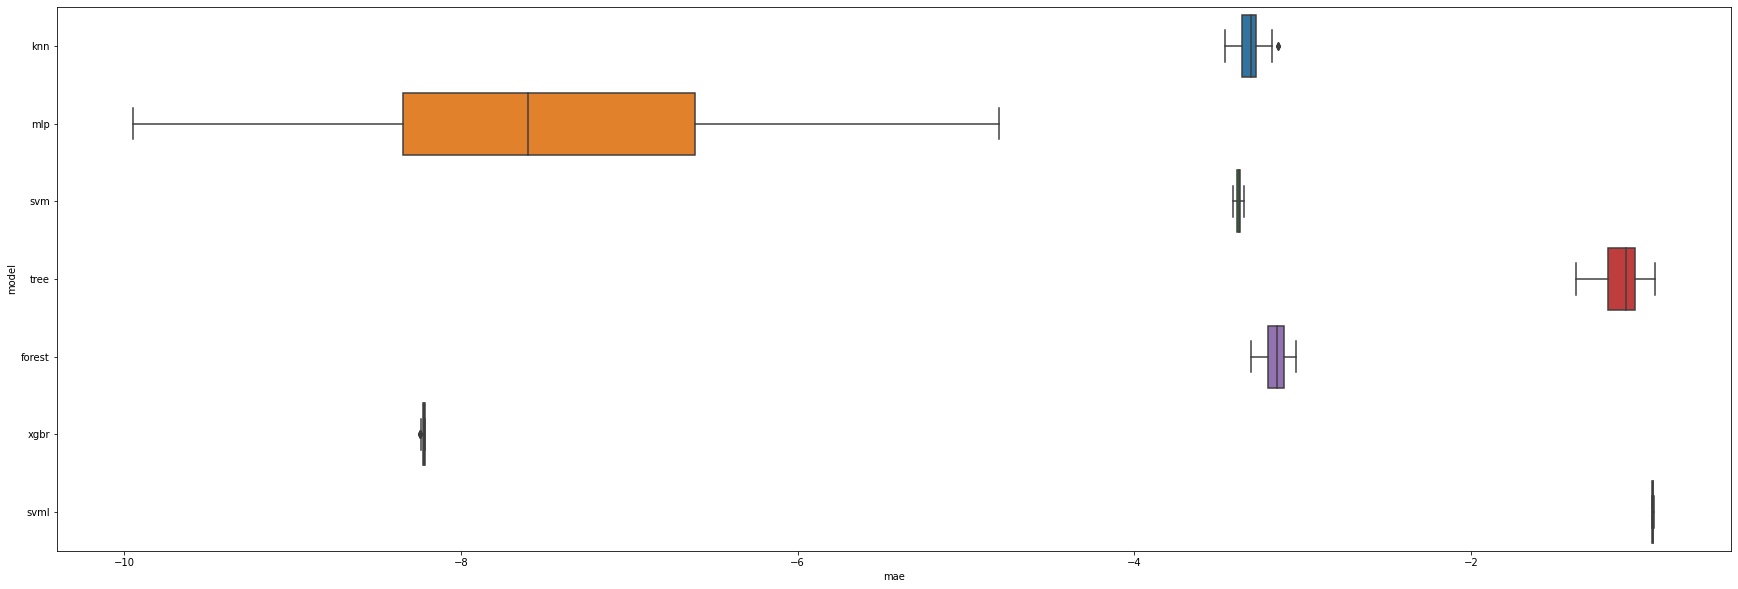

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(x= 'mae', y='model', data=results_boxplot);